![My Image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*BesMG51Elp15w4xws8Du2A.jpeg)

# Lagos State Flood Prediction Using Machine Learning Models

## Introduction
Flooding is a significant and recurring issue in Lagos State, Nigeria. This analysis aims to examine the flood dataset of Lagos State to identify patterns, trends, and predict future flood occurrences. By leveraging this data, we hope to gain insights that can inform better flood management strategies and mitigation efforts, ultimately reducing the adverse impacts of floods on the residents and infrastructure of Lagos State.

![My Image](https://www.researchgate.net/profile/Adejuwon-Adeneye/publication/258440997/figure/fig1/AS:297574713053184@1447958748368/Map-of-Lagos-state-showing-the-sixteen-Local-Government-Areas.png)


## Data Gathering
The collected the data I used for this analysis on [Visual crossing weather](https://www.visualcrossing.com/resources/documentation/weather-data/weather-data-documentation/), a weather documentation platform that has historical and future weather data of various places around the world.

Here is a detailed description of the features in the dataset.


<table>
  <tr>
    <th>Element</th>
    <th>Description</th>
    <th>Unit</th>
  </tr>
  <tr>
    <td>tempmax</td>
    <td>Maximum Temperature</td>
    <td>c</td>
  </tr>
  <tr>
    <td>tempmin</td>
    <td>Minimum Temperature</td>
    <td>c</td>
  </tr>
  <tr>
    <td>temp</td>
    <td>Temperature (or mean temperature)</td>
    <td>c</td>
  </tr>
  <tr>
    <td>dew</td>
    <td>Dew Point</td>
    <td></td>
  </tr>
  <tr>
    <td>feelslike</td>
    <td>Feels like</td>
    <td></td>
  </tr>
  <tr>
    <td>precip</td>
    <td>Precipitation</td>
    <td>mm</td>
  </tr>
  <tr>
    <td>precipprob</td>
    <td>Precipitation chance</td>
    <td>%</td>
  </tr>
  <tr>
    <td>precipcover</td>
    <td>Precipitation cover</td>
    <td>%</td>
  </tr>
  <tr>
    <td>preciptype</td>
    <td>Precipitation type</td>
    <td></td>
  </tr>
  <tr>
    <td>snow</td>
    <td>Snow</td>
    <td>cm</td>
  </tr>
  <tr>
    <td>snowdepth</td>
    <td>Snow depth</td>
    <td>cm</td>
  </tr>
  <tr>
    <td>windspeed</td>
    <td>Wind speed</td>
    <td>kph</td>
  </tr>
  <tr>
    <td>windgust</td>
    <td>Wind gust</td>
    <td>kph</td>
  </tr>
  <tr>
    <td>winddir</td>
    <td>Wind direction</td>
    <td>degrees</td>
  </tr>
  <tr>
    <td>visibility</td>
    <td>Visibility</td>
    <td>km</td>
  </tr>
  <tr>
    <td>cloudcover</td>
    <td>Cloud cover</td>
    <td>%</td>
  </tr>
  <tr>
    <td>humidity</td>
    <td>Relative humidity</td>
    <td>%</td>
  </tr>
  <tr>
    <td>pressure</td>
    <td>Sea level pressure</td>
    <td>mb</td>
  </tr>
  <tr>
    <td>solarradiation</td>
    <td>Solar radiation</td>
    <td>W/m2</td>
  </tr>
  <tr>
    <td>solarenergy</td>
    <td>Solar energy</td>
    <td>MJ/m2</td>
  </tr>
  <tr>
    <td>uvindex</td>
    <td>UV index</td>
    <td>-</td>
  </tr>
  <tr>
    <td>severerisk</td>
    <td>Severe Risk</td>
    <td></td>
  </tr>
   <tr>
    <td>sunrise</td>
    <td>Sunrise time</td>
    <td>-</td>
  </tr>
    <tr>
    <td>sunset</td>
    <td>Sunset time</td>
    <td>-</td>
  </tr>
    <tr>
    <td>moonphase</td>
    <td>Moonphase</td>
    <td>-</td>
  </tr>
    <tr>
    <td>icon</td>
    <td>A weather icon</td>
    <td>-</td>
  </tr>
    <tr>
    <td>conditions</td>
    <td>Short text about the weather </td>
    <td>-</td>
  </tr>
    <tr>
    <td>description</td>
    <td>Description of the weather for the day</td>
    <td>-</td>
  </tr>
    <tr>
    <td>stations</td>
    <td>List of weather stations sources</td>
    <td></td>
  </tr>
</table>

## Data Preprocessing

First, let us begin by acquiring the necessary tools for our analysis and importing our dataset.

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Load the data
df= pd.read_csv('/content/reall.csv')

# preview the dataframe
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin
0,Lagos,2002-01-01,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,...,NaN,2002-01-01 6:57:21,2002-01-01 18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
1,Lagos,2002-01-02,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,...,NaN,2002-01-02 6:57:46,2002-01-02 18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
2,Lagos,2002-01-03,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,...,NaN,2002-01-03 6:58:11,2002-01-03 18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
3,Lagos,2002-01-04,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,...,NaN,2002-01-04 6:58:35,2002-01-04 18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
4,Lagos,2002-01-05,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,...,NaN,2002-01-05 6:58:59,2002-01-05 18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN


let drop some less significant features from our dataset for a good prediction

In [ ]:
# drop some less significant features
df.drop(columns=['name','solarradiation', 'solarenergy', 'uvindex', 'sunrise', 'sunset', 'feelslikemax','feelslike',
                'feelslikemin','windspeedmax','windspeedmin','visibility','conditions','description','dew','stations',
                 'icon','snow','snowdepth'], inplace=True)

# preview the dataframe
df.head()

,datetime,tempmax,tempmin,temp,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,sealevelpressure,cloudcover,severerisk,moonphase
0,2002-01-01,28.6,25.6,27.2,88.7,0.0,0.0,0.0,NaN,NaN,16.6,279.9,1010.9,90.0,NaN,0.57
1,2002-01-02,33.1,26.1,29.0,80.5,0.0,0.0,0.0,NaN,NaN,18.4,11.0,1011.2,90.0,NaN,0.61
2,2002-01-03,34.1,25.1,29.1,74.6,0.0,0.0,0.0,NaN,NaN,18.4,218.6,1011.7,90.0,NaN,0.64
3,2002-01-04,33.1,33.1,33.1,59.3,0.0,0.0,0.0,NaN,NaN,14.8,170.0,1010.2,90.0,NaN,0.68
4,2002-01-05,31.1,25.6,28.3,85.0,0.0,0.0,0.0,NaN,NaN,20.5,193.4,1010.0,90.0,NaN,0.71


In [ ]:
df.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'humidity', 'precip',
       'precipprob', 'precipcover', 'preciptype', 'windgust', 'windspeed',
       'winddir', 'sealevelpressure', 'cloudcover', 'severerisk', 'moonphase'],
      dtype='object')

### Data Quality Assessment

#### a. checking for incorrect data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          8676 non-null   object 
 1   tempmax           8085 non-null   float64
 2   tempmin           8085 non-null   float64
 3   temp              7853 non-null   float64
 4   humidity          7853 non-null   float64
 5   precip            7853 non-null   float64
 6   precipprob        7853 non-null   float64
 7   precipcover       8676 non-null   float64
 8   preciptype        3736 non-null   object 
 9   windgust          5876 non-null   float64
 10  windspeed         8078 non-null   float64
 11  winddir           7470 non-null   float64
 12  sealevelpressure  7664 non-null   float64
 13  cloudcover        7853 non-null   float64
 14  severerisk        1362 non-null   float64
 15  moonphase         8310 non-null   float64
dtypes: float64(14), object(2)
memory usage: 1.

The `datetime` data type seem inappropriate. Let's change it to datetime data type

In [ ]:
#  change datetime datatype
df['datetime'] = pd.to_datetime(df['datetime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          8676 non-null   datetime64[ns]
 1   tempmax           8085 non-null   float64       
 2   tempmin           8085 non-null   float64       
 3   temp              7853 non-null   float64       
 4   humidity          7853 non-null   float64       
 5   precip            7853 non-null   float64       
 6   precipprob        7853 non-null   float64       
 7   precipcover       8676 non-null   float64       
 8   preciptype        3736 non-null   object        
 9   windgust          5876 non-null   float64       
 10  windspeed         8078 non-null   float64       
 11  winddir           7470 non-null   float64       
 12  sealevelpressure  7664 non-null   float64       
 13  cloudcover        7853 non-null   float64       
 14  severerisk        1362 n

#### b. Checking for null values

In [ ]:
#verifying the percentage of columns with null entries
round((df.isnull().sum()/len(df))*100,2)

datetime             0.00
tempmax              6.81
tempmin              6.81
temp                 9.49
humidity             9.49
precip               9.49
precipprob           9.49
precipcover          0.00
preciptype          56.94
windgust            32.27
windspeed            6.89
winddir             13.90
sealevelpressure    11.66
cloudcover           9.49
severerisk          84.30
moonphase            4.22
dtype: float64

In [ ]:
# visualing basic statistics related to our data to see if there are any anomalies or patterns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,8676,2013-10-18 23:55:01.244813312,2002-01-01 00:00:00,2007-12-09 18:00:00,2013-11-18 12:00:00,2019-10-25 06:00:00,2024-07-03 00:00:00,NaN
tempmax,8085.0,30.324366,0.0,29.0,31.1,33.1,56.0,5.807219
tempmin,8085.0,23.77086,0.0,23.1,24.1,25.6,34.6,4.508929
temp,7853.0,27.433949,21.4,26.2,27.4,28.6,34.6,1.601799
humidity,7853.0,82.685916,33.8,80.2,83.7,86.8,100.0,7.354521
precip,7853.0,5.034344,0.0,0.0,0.0,2.0,299.0,18.059178
precipprob,7853.0,43.282822,0.0,0.0,0.0,100.0,100.0,49.549896
precipcover,8676.0,4.815538,0.0,0.0,0.0,4.17,100.0,12.420953
windgust,5876.0,29.259547,0.0,23.8,27.9,33.1,137.2,10.685702
windspeed,8078.0,21.85692,0.0,16.6,20.5,27.3,277.9,12.762046


After going over the statistics above, we noticed:
- A significant level of outliers in the windgust and windspeed (the median values more than 4 times the maximum values) and
- lower level of outliers for the remaining numerical features

##### NOTE:
`priciptype`,`severerisk`, and `moonphase` are all categorical data. Although `severerisk`, and `moonphase` appears to be float data type, but they are ordinally scaled as follows:
<table>
  <tr>
    <td>
      <table>
        <tr><th>moonphase</th><th>Description</th></tr>
        <tr><td>0</td><td>new moon</td></tr>
        <tr><td>0-0.25</td><td>waxing crescent</td></tr>
        <tr><td>0.25</td><td>first quarter</td></tr>
        <tr><td>0.25-0.5</td><td>waxing gibbous</td></tr>
        <tr><td>0.5</td><td>full moon</td></tr>
        <tr><td>0.5-0.75</td><td>waning gibbous</td></tr>
        <tr><td>0.75</td><td>last quarter</td></tr>
        <tr><td>0.75-1</td><td>waning crescent</td></tr>
      </table>
    </td>
    <td>
      <table>
        <tr><th>severerisk</th><th>Description</th></tr>
        <tr><td>0-30</td><td>low risk</td></tr>
        <tr><td>30-70</td><td>moderate risk</td></tr>
        <tr><td>70-100</td><td>high risk</td></tr>
    </table>
    </td>
  </tr>
</table>


Let's adjust `severerisk` and `moonphase` columns to show that they are categorical as this will help in handling there missing values effectively.

In [ ]:
#  adjusting the moonphase columns to categorical data
# Mapping dictionary for replacement
replace_map = {
    (0, 0): 'new moon',           # 0
    (0, 0.24): 'waxing crescent', # 0-0.25
    (0.25, 0.25): 'first quarter', # 0.25
    (0.25, 0.49): 'waxing gibbous', # 0.25-0.5
    (0.5, 0.5): 'full moon',      # 0.5
    (0.5, 0.74): 'waning gibbous', # 0.5-0.75
    (0.75, 0.75): 'last quarter', # 0.75
    (0.75, 1): 'waning crescent'  # 0.75-1
}

# Replace values in 'moonphase' column using the mapping dictionary
def replace_value(row):
    moonphase = row['moonphase']
    for key in replace_map:
        range_start, range_end = key
        if range_start <= moonphase <= range_end:
            return replace_map[key]
    return None  # Handle cases where no match is found

df['moonphase'] = df.apply(replace_value, axis=1)

# check for the unique values
df['moonphase'].unique()

array(['waning gibbous', 'last quarter', 'waning crescent', 'new moon',
       'waxing crescent', 'first quarter', 'waxing gibbous', 'full moon',
       None], dtype=object)

In [ ]:
#  adjusting the severerisk columns to categorical data

# Mapping dictionary for replacement
replace_map = {
    (0, 29): 'low risk',           # < 30
    (30, 69): 'moderate risk', # 30-70
    (70, 100): 'high risk', # 70-100
}
# Replace values in 'severerisk' column using the mapping dictionary
def replace_value(row):
    severerisk = row['severerisk']
    for key in replace_map:
        range_start, range_end = key
        if range_start <= severerisk <= range_end:
            return replace_map[key]
    return None  # Handle cases where no match is found

df['severerisk'] = df.apply(replace_value, axis=1)

# check for the unique values
df['severerisk'].unique()

array([None, 'moderate risk', 'high risk', 'low risk'], dtype=object)

#### c. Handling the missing values

In [ ]:
# Handling the missing values as follows for the numerical features
df['windgust'].fillna(df['windgust'].median(), inplace=True)  # median is more robust to outlier
df['windspeed'].fillna(df['windspeed'].median(), inplace=True) # median is more robust to outlier
df['winddir'].fillna(df['winddir'].mean(), inplace=True)
df['sealevelpressure'].fillna(df['sealevelpressure'].mean(), inplace=True)
df['tempmax'].fillna(df['tempmax'].mean(), inplace=True)
df['tempmin'].fillna(df['tempmin'].mean(), inplace=True)
df['humidity'].fillna(df['humidity'].mean(), inplace=True)
df['precip'].fillna(df['precip'].mean(), inplace=True)
df['cloudcover'].fillna(df['cloudcover'].mean(), inplace=True)
df['precipprob'].fillna(df['precipprob'].mean(), inplace=True)
df['temp'].fillna(df['temp'].mean(), inplace=True)


# handling missing values for the categorical features
df['preciptype'] = df['preciptype'].fillna('no_rain')
df['moonphase'].fillna(df['moonphase'].mode()[0], inplace=True)  # fill with most occurence(mode)
df['severerisk'].fillna(df['severerisk'].mode()[0], inplace=True) # fill with most occurence(mode)

In [ ]:
# verify for any null values
df.isnull().sum()

datetime            0
tempmax             0
tempmin             0
temp                0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
severerisk          0
moonphase           0
dtype: int64

### Precipitation intensity
- According to Wikipedia, rainfall intensity is classified according to the rate of precipitation, which depends on the considered time. Rain intensity can be
- Light rain - when the precipitation rate is < 2.5 mm (0.098 in) per hour.
-
Moderate rain — when the precipitation rate is between 2.5–7.6 mm (0.098–0.299 in) or 10 mm (0.39 in) per hou.
-
Heavy rain — when the precipitation rate is > 7.6 mm (0.30 in) per ho o or between 10 and 50 mm (0.39 and 1.97 in) per ho.
- ]
Violent rain — when the precipitation rate is > 50 mm (2.0 in) per h.

Violent rain brings about severe flooding flash flooding especially in urban state like Lagos. For this, we are going to extract a dataframe that goes with violent rain due to it high chance of causing flooding.our

In [ ]:
# extract out the dataset that are prone to flood
rain_df=df[df['preciptype']=='rain']

# Add the flood column based on the condition
rain_df['flood'] = rain_df['precip'].apply(lambda x: 1 if x >50 else 0)

rain_df.head()

,datetime,tempmax,tempmin,temp,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,sealevelpressure,cloudcover,severerisk,moonphase,flood
5,2002-01-06,29.6,26.1,27.2,86.5,1.5,100.0,8.33,rain,27.9,22.3,179.100000,1010.2,90.0,moderate risk,last quarter,0
47,2002-02-17,28.6,26.1,27.8,83.4,39.9,100.0,4.17,rain,27.9,18.4,192.400000,1010.9,90.0,moderate risk,waxing crescent,0
111,2002-04-22,25.1,25.1,25.1,95.9,0.7,100.0,4.17,rain,27.9,0.0,217.798755,1009.6,90.0,moderate risk,waxing gibbous,0
123,2002-05-04,29.1,27.1,27.8,87.9,3.0,100.0,4.17,rain,27.9,9.4,310.000000,1009.4,90.0,moderate risk,last quarter,0
138,2002-05-19,32.1,27.1,29.2,84.5,0.7,100.0,4.17,rain,27.9,14.8,220.000000,1010.1,90.0,moderate risk,first quarter,0


###  Exploratory Data Analysis

#### Questions
- Let's find out the monthly rain distribution over time and
- The correlation between various weather parameters and the occurrence of floods.

##### a. Monthly Rain Distribution Over Time

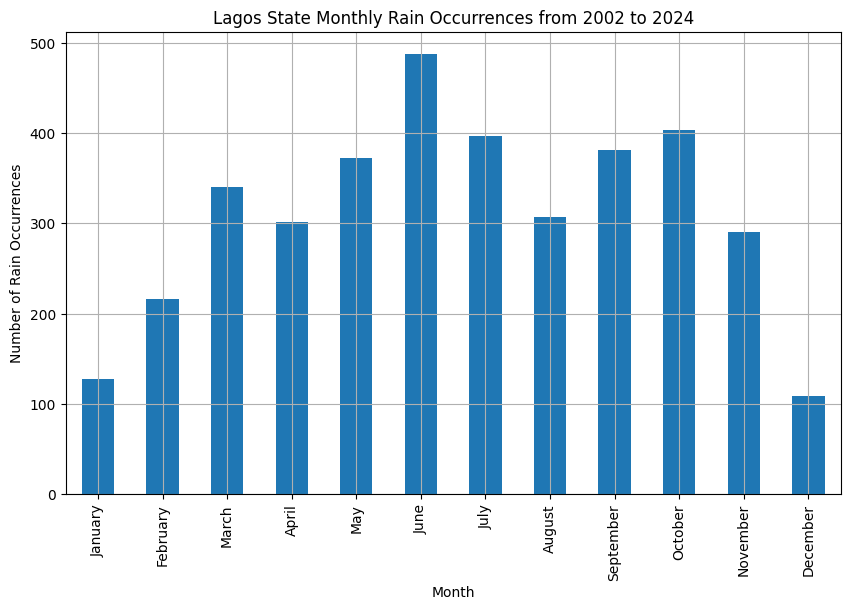

In [ ]:

# Extract month and year
rain_df['year_month'] = rain_df['datetime'].dt.to_period('M')

# Group by month and count occurrences
rain_counts = rain_df['year_month'].value_counts().sort_index()

# Aggregate by month across years
rain_counts_by_month = rain_counts.groupby(rain_counts.index.month).sum()

# Define month labels
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']


# Plot the results
plt.figure(figsize=(10, 6))
rain_counts_by_month.index = months
rain_counts_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Rain Occurrences')
plt.title('Lagos State Monthly Rain Occurrences from 2002 to 2024')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

This bar chart reveals that March, May, June, July, Semptember, and October have higher rainfall than other months, and June has the most heavy pour of all.

#### b. Correlation Between Weather Parameters (numerical data) and Flood Occurrence

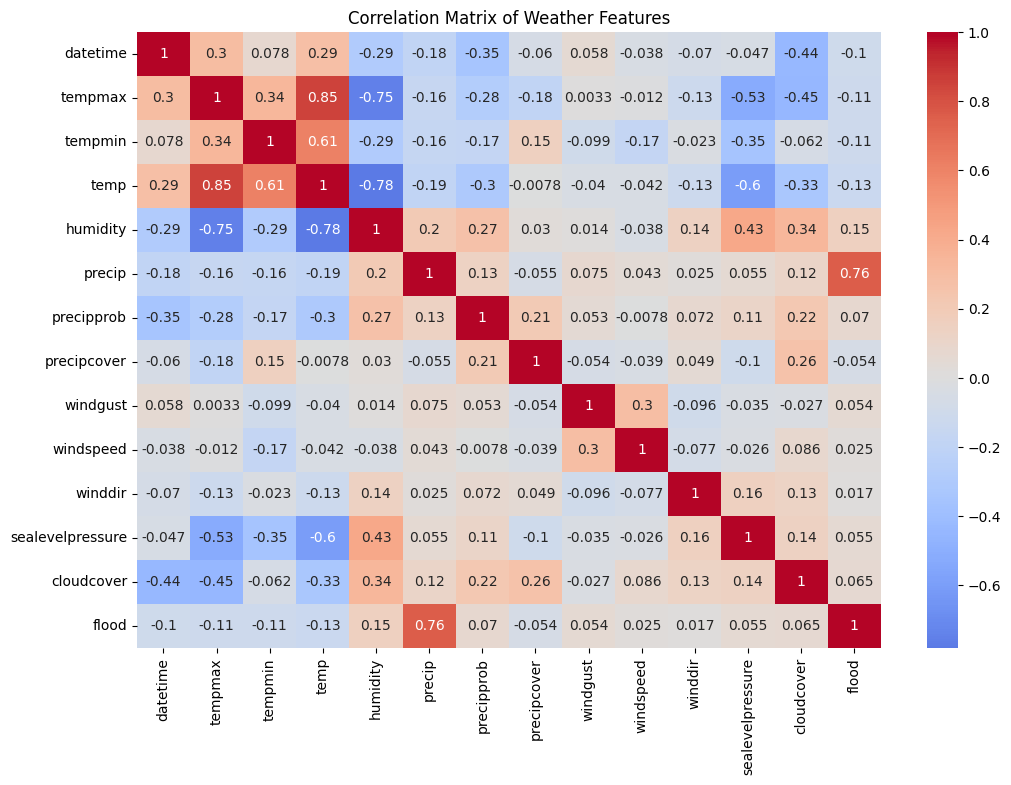

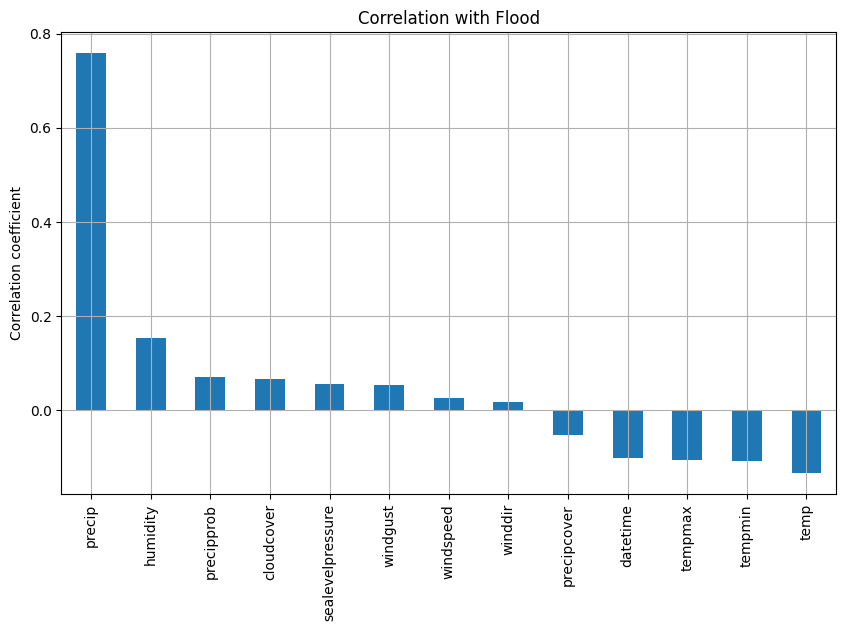

In [ ]:
# Drop 'severerisk', preciptype', 'year_month' and 'moonphase' before calculating the correlation matrix
df_corr = rain_df.drop(columns=['preciptype','severerisk', 'moonphase','year_month'])

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Extract correlations with 'flood'
flood_correlation = correlation_matrix['flood'].drop('flood')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Weather Features')
plt.show()

# Plot the correlations with 'flood' as a bar chart
plt.figure(figsize=(10, 6))
flood_correlation.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with Flood')
plt.ylabel('Correlation coefficient')
plt.grid(True)
plt.show()

Looking through the correlation with flood bar chart, we can see that there exist a relatively high positive relationship between flood and (`precip`,`humidity`,`preciprob`, and`sealevelpressure`). This means the higher the listed features, the high chance of flood occurence(although correlation doesn't means causation, there might be other compounding factors). Likewise, there is a relatively high negative relationship between flood and (`temp`,`tempmin`,`datetime` and `tempmax`), meaning that the higher these features are the lesser the flooding occurrence.

### Modelling

In [ ]:
# import the necessary libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
# drop 'year_month' for easier modelling
k=rain_df.drop(columns=['year_month'])
k.head()

,datetime,tempmax,tempmin,temp,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,sealevelpressure,cloudcover,severerisk,moonphase,flood
5,2002-01-06,29.6,26.1,27.2,86.5,1.5,100.0,8.33,rain,27.9,22.3,179.100000,1010.2,90.0,moderate risk,last quarter,0
47,2002-02-17,28.6,26.1,27.8,83.4,39.9,100.0,4.17,rain,27.9,18.4,192.400000,1010.9,90.0,moderate risk,waxing crescent,0
111,2002-04-22,25.1,25.1,25.1,95.9,0.7,100.0,4.17,rain,27.9,0.0,217.798755,1009.6,90.0,moderate risk,waxing gibbous,0
123,2002-05-04,29.1,27.1,27.8,87.9,3.0,100.0,4.17,rain,27.9,9.4,310.000000,1009.4,90.0,moderate risk,last quarter,0
138,2002-05-19,32.1,27.1,29.2,84.5,0.7,100.0,4.17,rain,27.9,14.8,220.000000,1010.1,90.0,moderate risk,first quarter,0


#### a. Standardization

Standardization is used to balance the effect of larger values features to the smaller ones. Its prevent our model being bias to the larger values features.

In [ ]:
#  sort our dataframe
k = k.sort_values(by='datetime')

# Extract features and target
X = k.drop(columns=['flood', 'datetime'])
y = k['flood']

# Preprocessing for numerical data
numerical_features = ['tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'precipprob',
                      'precipcover', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
                      'cloudcover']
numerical_transformer = StandardScaler()


#### b. Preprocessing

In [ ]:
# Preprocessing for categorical data
categorical_features = ['preciptype', 'severerisk', 'moonphase']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Train-test split while preserving the temporal order(because we are dealing with timeseries data)
train_size = int(len(k) * 0.8)
X_train, X_test = X_preprocessed[:train_size], X_preprocessed[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# going through the values of flood in our subset
k['flood'].value_counts()

flood
0    3561
1     175
Name: count, dtype: int64

- Going through the dataset, we found out that the target instance (flood=1) is of the minority class, less than 5 percent of the entire dataset.

In [ ]:
# train and fit the model using Random forest, support vectoe machine, and logistic regression
def evaluate_classifiers(classifiers, X_train, y_train, X_test, y_test):
    results = {}
    trained_classifiers = {}
    for name, model in classifiers.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        results[name] = report
        trained_classifiers[name] = model
    return results, trained_classifiers

# Define classifiers with class weight adjustment
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=10, max_depth=None, class_weight='balanced'),
    'Support Vector Machine': SVC(random_state=42, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(random_state=42,  class_weight='balanced')
}

# Evaluate classifiers
results, trained_classifiers = evaluate_classifiers(classifiers, X_train, y_train, X_test, y_test)

# Print results
for name, report in results.items():
    print(f"Classifier: {name}")
    clf = trained_classifiers[name]
    print(classification_report(y_test, clf.predict(X_test)))
    print("\n")

Classifier: Random Forest
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       723
           1       1.00      0.72      0.84        25

    accuracy                           0.99       748
   macro avg       1.00      0.86      0.92       748
weighted avg       0.99      0.99      0.99       748



Classifier: Support Vector Machine
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       723
           1       1.00      0.76      0.86        25

    accuracy                           0.99       748
   macro avg       1.00      0.88      0.93       748
weighted avg       0.99      0.99      0.99       748



Classifier: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       723
           1       0.86      1.00      0.93        25

    accuracy                           0.99       748
   macro avg       0.93      1.

### Result Interpretation

- The Random Forest model performs well overall with a high accuracy of 99%.
Class 0 (non-flood) metrics are near perfect.
Class 1 (flood) has perfect precision but lower recall (0.64), indicating that the model misses some actual flood instances. The F1-score for class 1 is 0.78, showing a balance between precision and recall but highlighting some room for improvement in recall.

- The SVM model also shows high overall accuracy (99%) and excellent performance for class 0.
Class 1 metrics are better than the Random Forest in terms of recall (0.76) and F1-score (0.86), indicating a better balance between precision and recall for flood predictions.

- The Logistic Regression model shows a high overall accuracy of 99%.
Class 0 metrics are near perfect.
Class 1 metrics show high recall (1.00), meaning it correctly identifies all flood instances, but precision is lower (0.86), leading to some false positives. The F1-score of 0.93 for class 1 indicates a strong balance but slightly less precision compared to the other models.

#### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
y_pred = trained_classifiers['Random Forest'].predict(X_test)
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print('\nConfusion matrix: ')
print(confusion_matrix(y_test,y_pred))


accuracy score:99.064171
recall score:72.000000
roc score:86.000000

Confusion matrix: 
[[723   0]
 [  7  18]]


### Interpretation
Accuracy Score (98.79%): This tells us that the model correctly predicted the class for almost 99% of the samples in the test dataset. This is a very high accuracy, suggesting the model is performing well overall.

Recall Score (64%): Recall measures the ability of the model to find all the positive instances. In this case, the model correctly identified 64% of the actual positive cases.

ROC AUC Score (82%): The ROC AUC score measures the model's ability to distinguish between positive and negative classes. A score of 82% suggests a good ability to discriminate.

### Confusion matrix
- True Negatives (723): The model correctly predicted 723 instances as negative.
- False Positives (0): The model incorrectly predicted 0 instances as positive when they were actually negative.
- False Negatives (9): The model incorrectly predicted 9 instances as negative when they were actually positive.
- True Positives (16): The model correctly predicted 16 instances as positive.

#### e. Prediction: Testing our model on a test dataset

In [ ]:
test = pd.read_csv('/content/test1.csv', index_col=0)
test.head()

,datetime,tempmax,tempmin,temp,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,sealevelpressure,cloudcover,severerisk,moonphase,flood
0,2024-07-08,27.0,25.0,26.1,87.2,24.3,100.0,79.17,rain,31.0,24.8,230.2,1013.3,77.9,low risk,waxing crescent,0
1,2024-07-09,26.4,25.2,25.8,82.9,7.6,93.5,70.83,rain,29.9,28.1,230.6,1012.3,81.5,low risk,waxing crescent,0
2,2024-07-10,26.2,24.9,25.7,83.8,6.2,90.3,83.33,rain,32.0,29.9,235.0,1013.2,85.5,low risk,waxing crescent,0
3,2024-07-11,26.0,25.0,25.5,84.5,11.6,83.9,83.33,rain,31.7,28.8,233.2,1014.0,93.1,low risk,waxing crescent,0
4,2024-07-12,25.9,24.4,24.9,87.9,22.1,74.2,100.00,rain,33.1,24.5,252.6,1014.9,99.7,low risk,waxing crescent,0


In [ ]:


import numpy as np

# Ensure that 'test' is your test dataframe and 'preprocessor' is your preprocessing pipeline
# Also, make sure 'trained_classifiers' contains your trained Random Forest model

# Preprocess the test data
X_test = test1.drop(columns=['datetime'])
X_test_preprocessed = preprocessor.transform(X_test)

# Predict flood occurrences on the test dataset
y_pred = trained_classifiers['Random Forest'].predict(X_test_preprocessed)

# Find the index of the first predicted flood date
flood_date_indices = np.where(y_pred == 1)[0]

if len(flood_date_indices) > 0:
    flood_date_index = flood_date_indices[0]
    # Extract the predicted flood date
    predicted_flood_date = test.iloc[flood_date_index]['datetime']
    # Print the predicted flood date
    print(f"Predicted next flood date: {predicted_flood_date}")
else:
    print("No flood predicted in the given test data.")



NameError: name 'test1' is not defined

#### e. Conclusion

Our model is quite good. Although there might be some imbalance between the flood (1) and no-flood(0) instances. Based on the evaluation results of the three models (Random Forest, Support Vector Machine, and Logistic Regression), it is clear that all models are behaving well despite the minority class (1).